In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

def plt_show(name, image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 获取图像的原始尺寸
    height, width, _ = img_rgb.shape
    # 设置图像的显示尺寸（以像素为单位）
    dpi = 100  # 图像的分辨率（点每英寸）
    figsize = width / float(dpi), height / float(dpi)
    # 创建一个具有指定尺寸的图形
    plt.figure(figsize=figsize)
    plt.imshow(img_rgb)
    title = name
    plt.title(title)
    # 清除坐标轴刻度
    plt.xticks([]) 
    plt.yticks([]) 
    plt.xlabel(f'figsize:{figsize}inch', fontsize=12, labelpad=15)
    plt.show()

### 图像融合

In [2]:
img_cat = cv2.imread('assets/cat.jpg')
img_dog = cv2.imread('assets/dog.jpg')

In [3]:
# img_cat+img_dog   图像尺寸不同，不能直接相加

In [4]:
img_cat.shape

(414, 500, 3)

In [5]:
img_dog.shape

(429, 499, 3)

cv2.resize(src, dsize, dst=None, fx=None, fy=None, interpolation=None)</br>
作用：改变图像大小
- src：输入图像矩阵
- dsize：输出图像的大小。它是一个二元组 (width, height)，表示输出图像的宽度和高度。如果这个参数为 None，则需要通过 fx 和 fy 来指定缩放比例。
- dst：输出图像。这个参数通常不需要设置，因为函数会返回调整大小后的图像。
- fx：沿水平轴的缩放比例。如果 dsize 为 None，则 fx 和 fy 用于计算输出图像的大小。fx 是输出图像宽度与输入图像宽度的比例。
- fy：沿垂直轴的缩放比例。如果 dsize 为 None，则 fy 用于计算输出图像的高度，是输出图像高度与输入图像高度的比例。
- interpolation：用于图像缩放的插值方法。有以下几种插值方法：
- - cv2.INTER_NEAREST：最近邻插值
- - cv2.INTER_LINEAR：双线性插值（默认值）
- - cv2.INTER_AREA：使用像素区域关系进行重采样。它可能是图像抽取的首选方法，因为它会产生无云纹理的结果。
- - cv2.INTER_CUBIC：双三次插值
- - cv2.INTER_LANCZOS4：Lanczos 插值


In [6]:
img_dog = cv2.resize(img_dog, (500, 414))
img_dog.shape

(414, 500, 3)

cv2.addWeighted(src1, alpha, src2, beta, gamma, dst=None, dtype=None)</br>
作用：对两幅图像进行加权和操作
- src1：第一幅输入图像矩阵。
- alpha：第一幅图像的权重。这个参数决定了 src1 在最终结果中的贡献程度。
- src2：第二幅输入图像矩阵，且必须与 src1 有相同的尺寸和类型。
- beta：第二幅图像的权重。这个参数决定了 src2 在最终结果中的贡献程度。
- gamma：一个加到权重总和上的标量值。这个参数可以在最终图像中添加一个常数，从而提高或降低整体亮度。
- dst：输出图像，其尺寸和深度与输入图像相同。如果这个参数不为 None，则它必须是一个预先分配好的图像数组。
- dtype：输出图像的所需深度，如果它不是与输入图像相同的深度，则必须指定。如果这个参数为 None，则输出图像将与输入图像具有相同的深度。


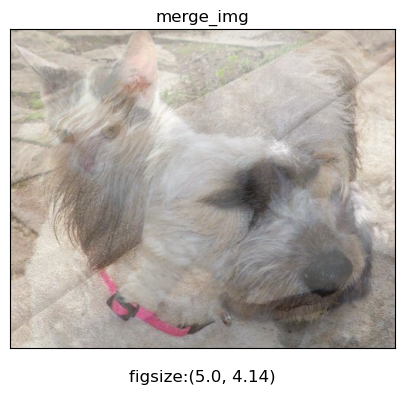

In [7]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)
# cv_show('merge_img', res)
plt_show('merge_img', res)

按比例改变图像尺寸示例

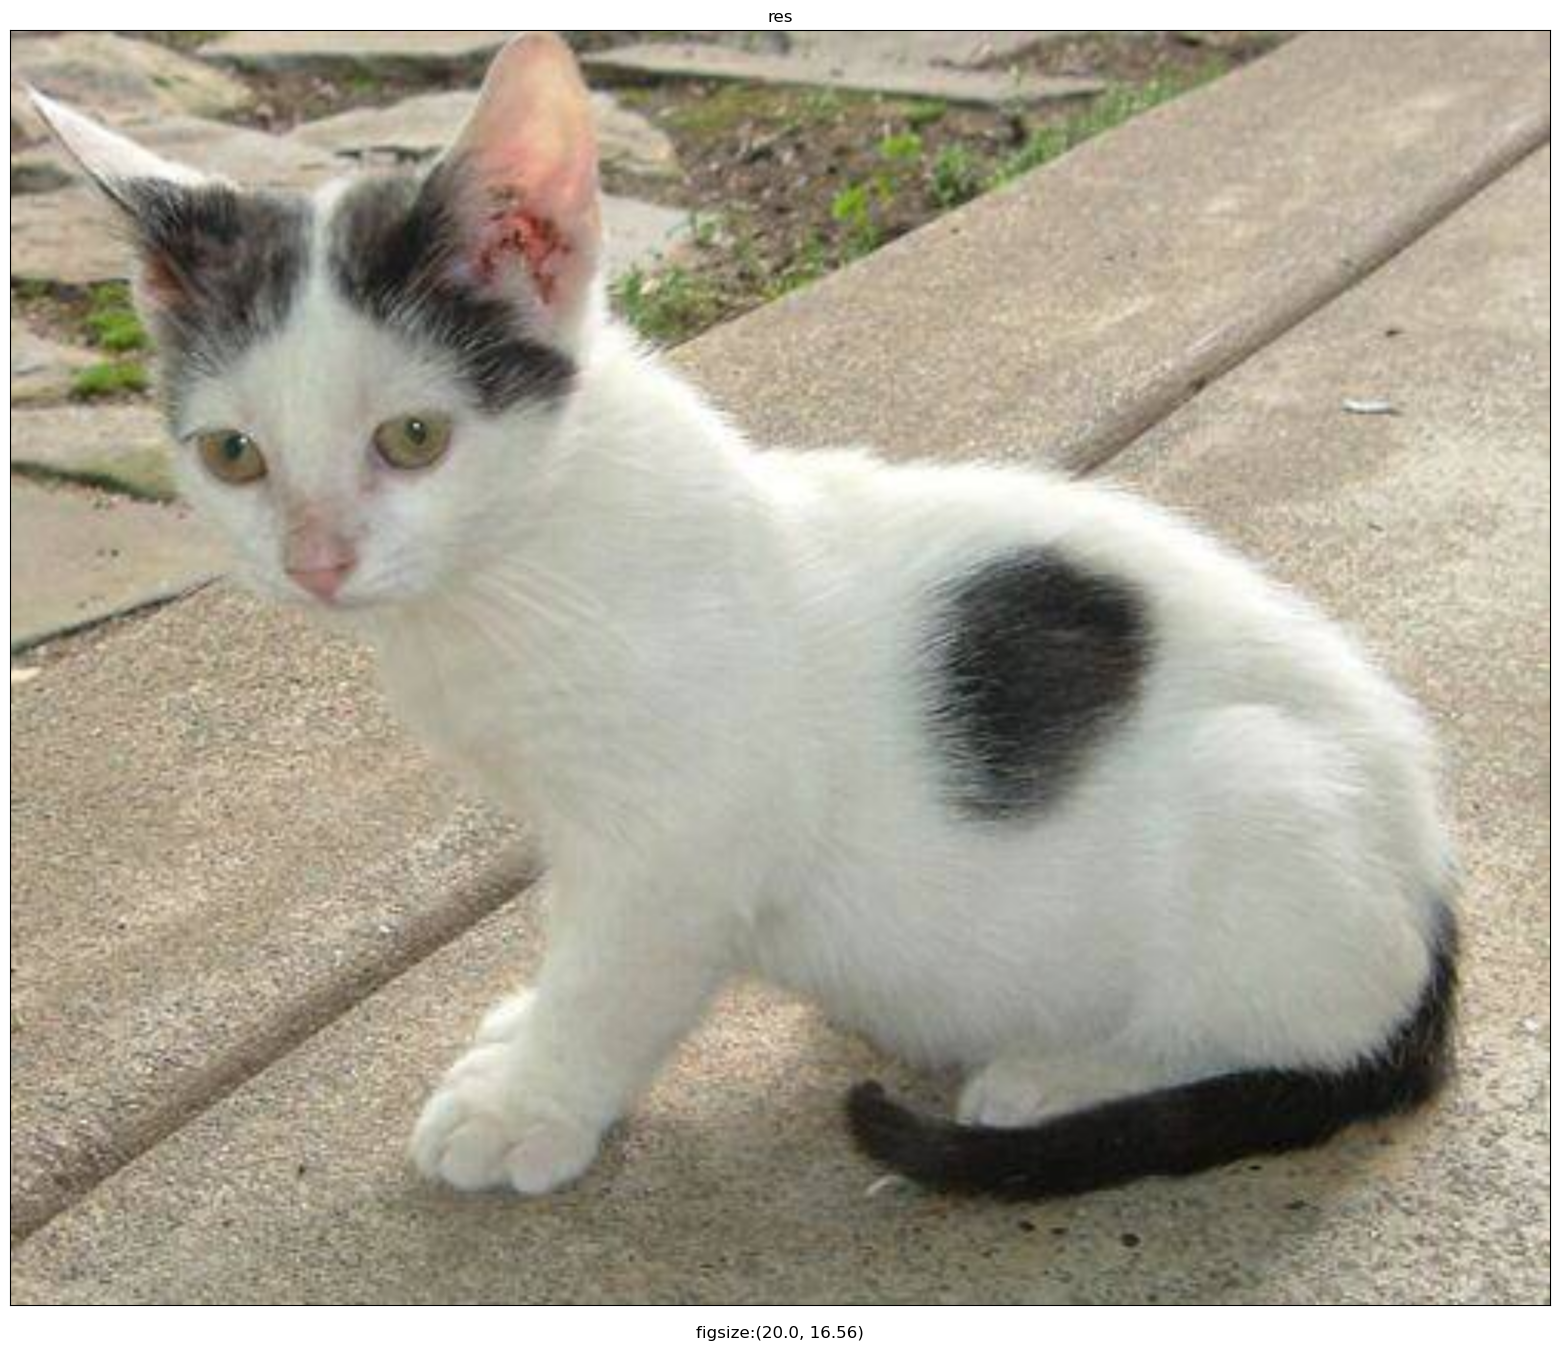

In [8]:
res = cv2.resize(img_cat, None, fx=4, fy=4)
plt_show('res', res)

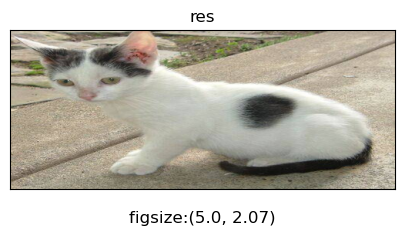

In [9]:
res = cv2.resize(img_cat, None, fx=1, fy=0.5)
plt_show('res', res)